# Train digital twin

## Instructions

To train digital twin, run the following script in the cell below:

```python
!python /workspace/fnn/scripts/train_digital_twin.py
```

or in a terminal:

```bash
/workspace/fnn/scripts/train_digital_twin.py
```

By default, a config file is expected at the following path:

`/workspace/fnn/data/train_digital_twin/config.yaml`

To update the config path, pass in the path as the first argument to the script:

```python
!python /workspace/fnn/scripts/train_digital_twin.py /path/to/config/file
```  

```bash
/workspace/fnn/scripts/train_digital_twin.py /path/to/config/file
```

## Description of `config.yaml` values:

**data-source**

    foundation-core
        session: int
            Which experimental session to load.

        scan_idx: int
            Which scan within that session.

        directory: str
            Where the pre-trained parameter files live.
    
    training
        directory: str
            Path to your training data.

        max_items: int (optional)
            If set, limits how many items the dataset loads (handy for dry runs).
    
    evaluation
        directory: str
            Path to your evaluation data.

**scheduler**

    cycle_size: int
        Length of one cycle in epochs

    warmup_epochs: int
        Number of initial epochs to linearly ramp LR up from ~0 to the scheduled value.

    warmup_cycles: int
        How many early cycles receive warmup treatment.

**optimizer**

    lr: float
        Base learning rate (peak value before scheduler modulation).

    decay: float
        Weight decay (L2 regularization).

    momentum: float
        SGD momentum.

    nesterov: int|bool
        Enable Nesterov momentum.

    clip: float
        Gradient norm cap (max global norm). 

    eps: float
        Small constant for numerical stability.

    seed: int
        Random seed used by the training stack.

**loader**

    sample_size: int
        Window length of each training sample (e.g., number of frames/steps per example).

    batch_size: int
        Number of samples per optimization step.

    training_size: int
        How many training samples per epoch to draw/iterate over.

    validation_size: int
        How many validation samples per validation pass.

**objective**

    sample_stream: int|bool
        If true, randomly selects a network stream during training (adds stochasticity, improves robustness). Always deterministic in validation.
        
    burnin_frames: int
        Number of initial frames to ignore for loss (but still feed through) so recurrent states can settle. 

**save-state**

    directory: str
        Output folder for training results.

    state_dict: str
        Model weights filename (PyTorch state_dict).

    metrics_filename: str
        Filename of per-epoch metrics CSV

    metrics_tensor: str
        Filename of raw epochs and metrics lists

In [1]:
import yaml
from pathlib import Path
from fnn.train import analysis

# Train

In [2]:
path_to_config = Path('/workspace/fnn/data/train_digital_twin/config.yaml')

In [ ]:
!python /workspace/fnn/scripts/train_digital_twin.py $path_to_config

# Training results

## load config

In [3]:
with open(path_to_config, 'r') as f:
    config = yaml.safe_load(f)

## load metrics

In [4]:
source_dir = Path(config['save-state']['directory'])
metrics_csv = source_dir / config['save-state']['metrics_csv']
df = analysis.load_metrics_csv(metrics_csv)

## plot metrics

Best training objective: {'epoch': 83, 'training_objective': 0.3535715706082992}
Best validation objective: {'epoch': 74, 'validation_objective': 0.3725795373320579}


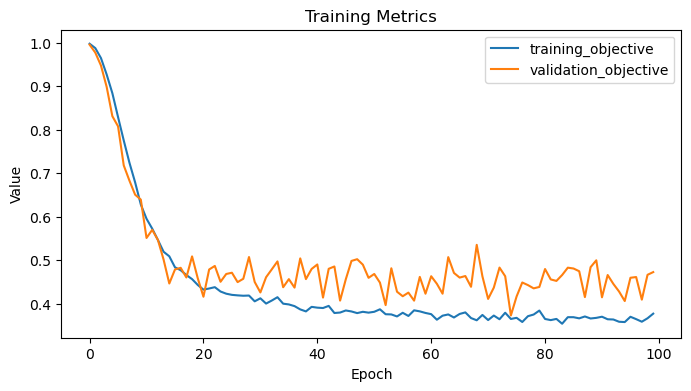

In [5]:
# 1) Best training epoch
best_train = analysis.summarize_metrics(df, metric="training_objective", mode="min")
print("Best training objective:", best_train)
# e.g. -> {'epoch': 0, 'training_objective': 1.0}

# 2) Best validation epoch
best_val = analysis.summarize_metrics(df, metric="validation_objective", mode="min")
print("Best validation objective:", best_val)

# 2) Plot train vs validation loss
fig, ax = analysis.plot_metrics(df, metrics=["training_objective", "validation_objective"])
# fig.savefig(save_dir / "loss_curves.png", dpi=150)